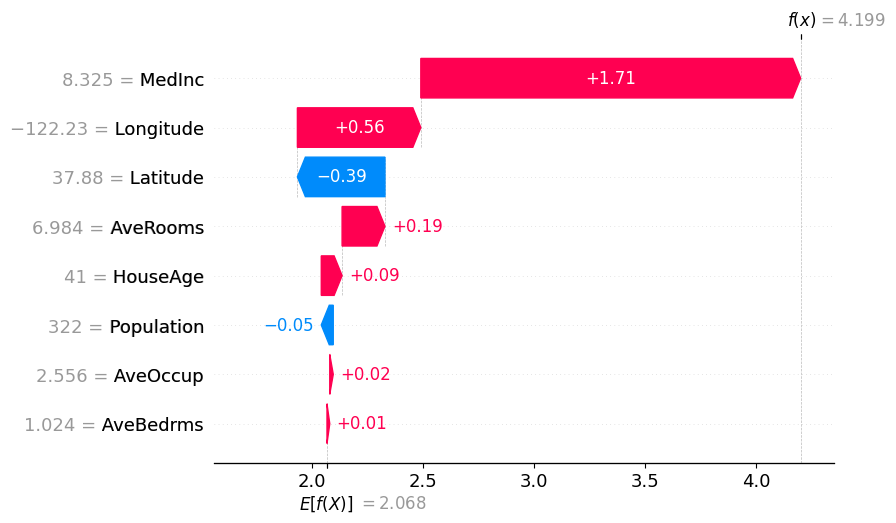

In [1]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.california()
model = xgboost.XGBRegressor().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [20]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(20,10), activation='relu', random_state=1)

clf.fit(X, y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20,10), activation='relu', random_state=1,
              solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10), random_state=1,
              solver='lbfgs')

In [21]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

In [22]:
[coef.shape for coef in clf.coefs_]

[(2, 20), (20, 10), (10, 1)]

In [23]:
clf.predict_proba([[2., 2.], [1., 2.]])

array([[1.73094872e-11, 1.00000000e+00],
       [6.76413592e-09, 9.99999993e-01]])

In [24]:
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(20,10), activation='relu', random_state=1)

clf.fit(X, y)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20,10), random_state=1,
              solver='lbfgs')



MLPClassifier(alpha=1e-05, hidden_layer_sizes=(20, 10), random_state=1,
              solver='lbfgs')

In [25]:
clf.predict([[1., 2.]])

array([[1, 1]])

In [26]:
clf.predict([[0., 0.]])

array([[0, 1]])

# Daqui pra baixo é sério

In [38]:
import numpy as np 
import pandas as pd

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [69]:
import os

In [71]:
pasta = '../dados/csv'
arquivos = os.listdir(pasta)
arquivos.remove('.gitignore')

dfs = []
for i in arquivos:
    print(pasta + '/' + i)
    dfs.append(pd.read_csv(pasta + '/' + i))
dfs

../dados/csv/Ovary_GSE6008.csv
../dados/csv/Throat_GSE42743.csv
../dados/csv/Leukemia_GSE28497.csv
../dados/csv/Breast_GSE70947.csv
../dados/csv/Prostate_GSE6919_U95B.csv
../dados/csv/Bladder_GSE31189.csv
../dados/csv/Brain_GSE50161.csv
../dados/csv/Gastric_GSE19826.csv
../dados/csv/Renal_GSE53757.csv
../dados/csv/Liver_GSE14520_U133A.csv
../dados/csv/Colorectal_GSE44076.csv
../dados/csv/Lung_GSE19804.csv


[             samples                    type  1007_s_at   1053_at    117_at  \
 0   GSM139377.CEL.gz  Ovarian_Tumor_ClearCel  10.222816  6.567943  6.103659   
 1   GSM139378.CEL.gz  Ovarian_Tumor_ClearCel  10.569607  6.618264  6.154864   
 2   GSM139379.CEL.gz  Ovarian_Tumor_ClearCel   9.965433  5.985501  5.934106   
 3   GSM139380.CEL.gz  Ovarian_Tumor_ClearCel  11.512321  6.750810  6.103626   
 4   GSM139381.CEL.gz  Ovarian_Tumor_ClearCel  10.591278  6.898227  5.990132   
 ..               ...                     ...        ...       ...       ...   
 93  GSM139471.CEL.gz    Ovarian_Tumor_Serous  10.789203  6.475850  5.915798   
 94  GSM139472.CEL.gz    Ovarian_Tumor_Serous  10.596586  6.721563  6.305911   
 95  GSM139473.CEL.gz    Ovarian_Tumor_Serous  10.409115  6.828334  5.824865   
 96  GSM139474.CEL.gz    Ovarian_Tumor_Serous  10.824846  6.423429  5.701621   
 97  GSM139475.CEL.gz    Ovarian_Tumor_Serous  11.582170  6.594849  5.791553   
 
        121_at  1255_g_at   1294_at   

In [74]:
dfs[0].head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM139377.CEL.gz,Ovarian_Tumor_ClearCel,10.222816,6.567943,6.103659,11.304395,4.293147,8.144304,5.560041,4.934525,...,4.641299,5.622958,13.450138,13.674907,4.882385,4.269357,4.132018,3.947823,4.098178,3.964369
1,GSM139378.CEL.gz,Ovarian_Tumor_ClearCel,10.569607,6.618264,6.154864,11.554262,4.400529,8.015739,5.983775,5.107069,...,5.289989,6.536466,13.733225,13.847321,5.329169,4.546660,4.250727,4.009764,4.267137,4.198557
2,GSM139379.CEL.gz,Ovarian_Tumor_ClearCel,9.965433,5.985501,5.934106,11.450878,4.531086,8.132967,5.674546,4.905562,...,4.422940,5.101742,12.676774,12.121132,4.807272,4.250548,4.212394,4.080735,4.152480,4.149600
3,GSM139380.CEL.gz,Ovarian_Tumor_ClearCel,11.512321,6.750810,6.103626,12.365913,4.498416,7.983277,5.685855,5.057813,...,4.552189,5.511945,13.112455,13.305265,4.935620,4.572358,4.400331,4.046336,4.170435,4.215428
4,GSM139381.CEL.gz,Ovarian_Tumor_ClearCel,10.591278,6.898227,5.990132,11.802105,4.539007,8.191786,5.817555,4.957920,...,4.554662,5.550139,13.087124,13.254806,4.895825,4.429253,4.360087,4.106183,4.250607,4.134473


In [75]:
dfs[1].head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,79,oral_cavity_cancer,12.259970,7.822784,7.076852,9.932529,6.079321,8.884615,7.078590,6.375017,...,14.097388,13.808292,14.879530,14.770789,6.277723,5.492216,4.872947,4.504117,5.058785,4.959956
1,80,oral_cavity_cancer,12.089249,7.754616,7.640473,10.528756,5.600609,9.038594,7.191701,6.505015,...,14.150997,13.975202,14.868461,14.710410,6.056832,5.809288,4.551575,4.536802,5.166772,5.218432
2,81,oral_cavity_cancer,12.253493,8.331198,6.980443,9.786068,5.357674,7.671959,6.878982,6.686758,...,13.171790,12.663488,14.375815,14.229668,5.902731,5.552099,4.660518,4.428401,4.990019,4.845970
3,82,oral_cavity_cancer,12.784522,8.175401,7.303593,9.868314,5.524533,7.802572,6.849571,6.628684,...,13.348310,12.854595,14.562390,14.354983,5.964846,5.588120,4.667251,4.555028,5.090857,4.773182
4,83,oral_cavity_cancer,12.594939,7.766172,8.706035,9.887563,5.529864,8.735436,6.943179,6.550663,...,13.820435,13.565086,14.817541,14.686170,5.594160,5.640937,4.492807,4.503870,4.920595,4.946553


In [76]:
dfs[2].head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM705467.CEL.gz,B-CELL_ALL,7.409521,5.009216,4.173607,7.315369,3.185411,7.620644,3.731541,3.471587,...,2.968822,3.223820,11.968681,12.100004,3.457507,2.967138,2.790814,2.563377,2.860505,2.608381
1,GSM705468.CEL.gz,B-CELL_ALL,7.177109,5.415108,4.426778,7.550818,3.134181,7.685723,3.907953,3.650995,...,2.982888,3.690411,12.318004,12.486741,3.396412,3.109629,2.856499,2.603355,2.908509,2.634063
2,GSM705469.CEL.gz,B-CELL_ALL,6.564918,5.248020,4.252414,7.175169,3.017718,7.956261,3.354557,3.302989,...,2.897425,3.611584,11.748222,11.807578,3.265585,3.057079,2.724642,2.440532,2.626871,2.673293
3,GSM705470.CEL.gz,B-CELL_ALL,6.872028,5.155963,4.388849,7.365933,3.031735,7.830002,3.508926,3.412491,...,3.024722,3.713087,12.208588,12.148604,3.175092,2.896168,2.798296,2.522343,2.762835,2.624163
4,GSM705471.CEL.gz,B-CELL_ALL,7.402105,5.509826,4.284291,7.214947,2.925269,7.789838,3.610425,3.362593,...,3.259802,4.096010,11.641305,11.713311,3.507025,3.119397,2.761294,2.546541,2.748511,2.738165


In [77]:
dfs[3].head()

,samples,type,NM_144987,NM_013290,ENST00000322831,NM_001625,lincRNA:chr7:226042-232442_R,NM_032391,ENST00000238571,XR_108906,...,lincRNA:chr4:77860976-77869926_F,NM_152343,NM_001005327,NM_001039355,lincRNA:chr21:44456656-44468556_R,lincRNA:chr9:4869500-4896050_F,NM_016053,NM_001080425,ENST00000555638,ENST00000508993
0,GSM1823702_252800417016_S01_GE1_107_Sep09_1_2,normal,8.693318,7.718016,6.044438,10.747077,9.133777,4.735581,5.634732,4.670231,...,7.570363,6.368684,4.784042,10.747723,5.090500,5.994149,10.649336,8.969439,4.985693,5.090500
1,GSM1823703_252800417016_S01_GE1_107_Sep09_2_1,normal,9.375980,7.072232,6.976741,10.429671,9.526500,5.221089,5.425187,4.860931,...,7.903335,5.713115,4.421074,11.299200,4.447052,4.421074,10.746854,8.174489,4.464177,4.536891
2,GSM1823704_252800416877_S01_GE1_107_Sep09_2_3,normal,8.943442,7.964573,6.269055,10.825025,9.396855,5.258506,5.824921,4.964604,...,7.705765,6.595364,4.410870,10.576807,5.003699,6.529257,10.430034,8.473468,4.668447,5.084127
3,GSM1823705_252800416894_S01_GE1_107_Sep09_1_1,normal,9.020798,7.824639,6.165165,11.646788,8.776462,4.648655,6.676692,4.770186,...,6.633058,5.786781,4.572984,11.175090,4.990888,6.669871,11.110395,8.880818,4.537626,4.648655
4,GSM1823706_252800416894_S01_GE1_107_Sep09_1_3,normal,8.806154,7.555348,6.230969,11.635247,8.911383,4.518054,6.520691,4.540453,...,6.211581,5.538635,4.613828,12.014365,4.979883,6.414621,10.909805,9.526500,4.670490,4.613828


In [78]:
dfs[4].head()

,samples,type,41880_at,41881_at,41882_at,41883_at,41884_at,41885_at,41886_r_at,41887_at,...,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at,AFFX-YEL002c/WBP1_at,AFFX-YEL018w/_at,AFFX-YEL021w/URA3_at,AFFX-YEL024w/RIP1_at
0,GSM152992.CEL,primary_prostate_tumor,2.414076,4.113824,2.035911,3.102248,2.115578,1.775455,6.107839,2.160168,...,2.955998,2.910953,2.095267,1.617076,2.060144,1.962483,1.919590,2.034229,3.013061,2.208421
1,GSM152993.CEL,primary_prostate_tumor,2.385157,4.078664,2.123064,3.087631,2.254190,1.815183,5.708878,2.134447,...,3.196521,2.975412,2.249950,1.757867,2.352185,2.054990,1.970140,1.768459,4.701207,2.513560
2,GSM152994.CEL,primary_prostate_tumor,2.295522,4.085505,2.144344,3.071539,2.229422,1.985899,5.679248,2.100443,...,2.929904,2.857025,2.047436,1.625339,2.065674,1.955286,1.768858,1.666836,3.115166,2.136760
3,GSM152995.CEL,primary_prostate_tumor,2.260478,4.466391,2.206410,3.505265,2.605014,1.887307,5.935039,2.261295,...,3.578538,3.420946,2.736342,1.940826,2.713500,2.363843,2.194837,1.981020,3.141350,2.550041
4,GSM152996.CEL,primary_prostate_tumor,2.229731,4.291435,2.506255,3.220628,2.404673,1.886664,5.965917,2.274317,...,3.558184,3.083316,2.562048,1.923414,2.775842,2.323899,2.288732,2.772796,2.848256,2.803264


In [79]:
dfs[5].head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,124,tumoral_urothelia,5.448550,2.855473,3.956391,6.990753,2.515888,4.532908,5.148095,3.420617,...,12.355006,12.073772,13.375017,13.129036,14.285014,12.222636,13.764253,2.635243,3.087296,2.749863
1,125,tumoral_urothelia,5.948208,2.795529,4.125916,7.085531,3.161936,4.603227,5.619804,3.194219,...,12.707785,12.626975,14.021214,13.727221,8.480108,3.431950,4.462056,2.317526,2.760757,2.868030
2,126,tumoral_urothelia,5.496239,2.881569,4.076561,7.316376,2.796445,4.633373,5.375143,3.135501,...,12.846351,12.738873,14.092312,13.794134,10.791820,3.698558,5.490943,2.323133,2.695995,2.670624
3,127,tumoral_urothelia,4.452496,3.223175,3.876904,6.595617,2.796589,4.049038,4.615981,3.522558,...,12.834101,12.285912,13.404010,13.281339,14.324621,13.056756,14.106172,3.091207,3.269359,3.089339
4,128,tumoral_urothelia,5.936431,3.102334,3.763463,7.077785,2.664594,5.046886,5.636532,3.410101,...,13.110890,13.000617,14.324056,13.976926,13.065277,8.800897,11.392414,2.364455,2.549492,2.595857


In [80]:
dfs[6].head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,834,ependymoma,12.498150,7.604868,6.880934,9.027128,4.176175,7.224920,6.085942,6.835999,...,9.979005,9.926470,12.719785,12.777792,5.403657,4.870548,4.047380,3.721936,4.516434,4.749940
1,835,ependymoma,13.067436,7.998090,7.209076,9.723322,4.826126,7.539381,6.250962,8.012549,...,11.924749,11.215930,13.605662,13.401342,5.224555,4.895315,3.786437,3.564481,4.430891,4.491416
2,836,ependymoma,13.068179,8.573674,8.647684,9.613002,4.396581,7.813101,6.007746,7.178156,...,12.154405,11.532460,13.764593,13.477800,5.303565,5.052184,4.005343,3.595382,4.563494,4.668827
3,837,ependymoma,12.456040,9.098977,6.628784,8.517677,4.154847,8.361843,6.596064,6.347285,...,11.969072,11.288801,13.600828,13.379029,4.953429,4.708371,3.892318,3.759429,4.748381,4.521275
4,838,ependymoma,12.699958,8.800721,11.556188,9.166309,4.165891,7.923826,6.212754,6.866387,...,11.411701,11.169317,13.751442,13.803646,4.892677,4.773806,3.796856,3.577544,4.504385,4.541450


In [81]:
dfs[7].head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,51,normal,8.657182,5.917842,4.081378,5.604782,1.953180,7.340298,4.602433,2.711914,...,11.172691,10.718696,12.871790,12.777205,9.026049,8.102074,8.272419,1.716624,1.986150,1.899776
1,53,normal,8.598569,5.808661,3.897057,6.110013,2.013474,6.497908,5.016505,2.974885,...,11.157285,10.785535,12.596902,12.624525,9.153952,7.861236,8.050337,1.685384,1.964701,2.185210
2,55,normal,8.430994,5.950260,4.332716,6.254038,1.813422,6.457473,4.638105,3.112174,...,11.153522,10.701399,12.551837,12.600645,8.867779,8.045815,7.949771,1.656331,2.141700,2.021019
3,57,normal,8.535152,6.308266,4.121209,6.010761,1.904669,7.134079,4.725949,3.044169,...,11.081797,10.631787,12.686963,12.571426,8.510924,7.332801,7.613719,1.616362,1.954657,1.956813
4,59,normal,8.134542,6.080714,3.830463,6.719863,1.988269,5.866202,4.801193,3.142488,...,11.189012,10.868705,12.610486,12.825922,8.739146,8.035209,7.890804,1.594809,1.881923,1.963733


In [82]:
dfs[8].head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,62,ccRCC,9.732061,7.251605,6.342055,9.515143,2.511348,7.204777,5.109239,4.345618,...,13.010712,12.625276,14.232007,14.140995,9.965724,8.100426,8.859505,2.431999,2.773826,2.861197
1,64,ccRCC,9.693332,7.073368,7.099059,9.236704,2.368806,7.897657,5.271118,4.045068,...,13.175571,12.780640,14.255111,14.246142,9.813475,7.530779,8.483367,2.478131,2.870517,2.652345
2,66,ccRCC,9.933633,6.782829,6.140410,9.922033,2.469306,7.544394,5.033225,4.366310,...,13.009798,12.460858,14.267958,14.098140,10.614793,8.783959,9.639353,2.614101,2.898979,2.670999
3,68,ccRCC,9.219208,8.097120,7.066591,8.575163,2.681295,7.124211,4.869673,4.382089,...,12.877853,12.304128,14.236970,13.994966,10.114575,7.983748,8.943351,2.533299,2.610641,2.833422
4,70,ccRCC,10.600143,7.103834,6.225211,10.379539,2.393158,7.176135,4.920854,4.651640,...,12.193690,11.488492,13.878683,13.667954,10.527176,8.224859,9.261765,2.339472,2.673702,2.668617


In [83]:
dfs[9].head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM362958.CEL.gz,HCC,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,...,10.735084,10.398843,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417
1,GSM362959.CEL.gz,HCC,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,...,11.528447,11.369919,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348
2,GSM362960.CEL.gz,HCC,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,...,10.892460,10.416151,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024
3,GSM362964.CEL.gz,HCC,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,...,10.686871,10.524836,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499
4,GSM362965.CEL.gz,HCC,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,...,11.014454,10.775566,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938


In [84]:
dfs[10].head()

,samples,type,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,...,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,648,normal,4.033083,3.991328,3.522487,3.278373,7.201681,2.166355,2.841044,2.217360,...,2.233052,2.321627,2.602364,2.272951,8.236181,4.766301,6.624126,2.191907,2.089431,2.196678
1,649,normal,3.117273,4.047258,3.042704,3.284518,8.425413,2.139838,2.632561,2.375537,...,2.033923,2.335442,2.061999,1.979024,7.079312,4.687041,5.775218,2.013578,2.189192,2.106554
2,650,normal,3.513162,4.154993,3.067877,3.478020,7.337592,2.070858,2.632643,2.542989,...,1.874741,2.522885,2.577079,2.017303,6.966157,3.498785,5.384117,2.124996,2.175054,2.168932
3,651,normal,3.487588,4.505968,3.688899,3.642465,7.319168,2.191685,2.567842,2.551201,...,1.795535,2.147798,2.439898,2.157677,8.899968,6.943802,7.908001,1.969787,2.125711,2.311073
4,652,normal,3.096174,3.997803,3.404045,2.984088,7.652969,2.374705,2.178836,2.852997,...,1.965137,2.655806,2.330900,2.230463,7.878767,5.718627,6.654383,2.015329,2.339691,2.347252


In [85]:
dfs[11].head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,556,tumoral,12.014762,6.983442,6.540233,8.362803,3.780203,9.188556,5.674197,6.262662,...,13.391406,12.688067,14.222519,14.145409,10.784380,9.229371,10.030957,3.569567,4.249465,3.982578
1,557,tumoral,11.317501,7.243950,6.927529,8.374879,3.845977,8.546901,5.680735,5.811109,...,13.307399,12.579227,14.192594,14.145906,9.772229,7.742450,8.501174,3.532915,4.134520,3.917711
2,558,tumoral,10.868398,7.213200,7.110826,8.258420,4.074300,9.295490,5.494098,5.788352,...,13.747090,13.054736,14.391262,14.313572,11.928554,10.481570,11.281070,3.453530,4.226954,3.706964
3,559,tumoral,11.968264,8.003929,7.167021,8.794291,3.679181,8.404464,5.877476,5.746267,...,12.679800,11.850551,13.872564,13.703017,4.679738,4.777636,4.329992,3.568955,4.091501,3.881763
4,560,tumoral,11.770490,8.372459,7.797680,8.891273,3.925639,8.453391,5.767672,5.705104,...,12.879360,12.116750,14.203035,14.030176,12.906862,8.174265,11.247059,3.628792,3.968562,4.000934


In [98]:
for i in range(0, len(dfs), 1):
    dfs[i] = dfs[i].drop(['samples'], axis=1)

In [99]:
len(dfs)

12

In [100]:
# Um exemplo apenas para mostrar que apagou a coluna samples
dfs[10].head()

,type,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,...,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,normal,4.033083,3.991328,3.522487,3.278373,7.201681,2.166355,2.841044,2.217360,2.066134,...,2.233052,2.321627,2.602364,2.272951,8.236181,4.766301,6.624126,2.191907,2.089431,2.196678
1,normal,3.117273,4.047258,3.042704,3.284518,8.425413,2.139838,2.632561,2.375537,2.417156,...,2.033923,2.335442,2.061999,1.979024,7.079312,4.687041,5.775218,2.013578,2.189192,2.106554
2,normal,3.513162,4.154993,3.067877,3.478020,7.337592,2.070858,2.632643,2.542989,2.371663,...,1.874741,2.522885,2.577079,2.017303,6.966157,3.498785,5.384117,2.124996,2.175054,2.168932
3,normal,3.487588,4.505968,3.688899,3.642465,7.319168,2.191685,2.567842,2.551201,2.517034,...,1.795535,2.147798,2.439898,2.157677,8.899968,6.943802,7.908001,1.969787,2.125711,2.311073
4,normal,3.096174,3.997803,3.404045,2.984088,7.652969,2.374705,2.178836,2.852997,2.407605,...,1.965137,2.655806,2.330900,2.230463,7.878767,5.718627,6.654383,2.015329,2.339691,2.347252


# Para o algoritmo:

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [53]:
y = df['type']
x = df.drop(['type'], axis=1)

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)

In [55]:
clf = MLPClassifier(hidden_layer_sizes=(20,10), max_iter=500, alpha=0.0001,
                     solver='sgd', activation='relu', verbose=10,  random_state=21, tol=0.000000001)

In [56]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.96831866
Iteration 2, loss = 8.27915732
Iteration 3, loss = 15.17095136
Iteration 4, loss = 13.73095974
Iteration 5, loss = 5.17253472
Iteration 6, loss = 8.09160190
Iteration 7, loss = 2.24075511
Iteration 8, loss = 0.87029442
Iteration 9, loss = 0.98639419
Iteration 10, loss = 0.67116946
Iteration 11, loss = 0.67161754
Iteration 12, loss = 0.67350483
Iteration 13, loss = 0.67783538
Iteration 14, loss = 0.68022303
Iteration 15, loss = 0.67890729
Iteration 16, loss = 0.67609976
Iteration 17, loss = 0.67431551
Iteration 18, loss = 0.67375816
Iteration 19, loss = 0.67292515
Iteration 20, loss = 0.66866335
Iteration 21, loss = 0.75238339
Iteration 22, loss = 0.70776527
Iteration 23, loss = 0.67227354
Iteration 24, loss = 0.67512786
Iteration 25, loss = 0.66835287
Iteration 26, loss = 0.66847180
Iteration 27, loss = 0.66857587
Iteration 28, loss = 0.66866606
Iteration 29, loss = 0.66874334
Iteration 30, loss = 0.66880868
Iteration 31, loss = 0.66886302
Iteration 32, l

In [57]:
accuracy_score(y_test, y_pred)

0.4090909090909091

In [58]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0, 13],
       [ 0,  9]])

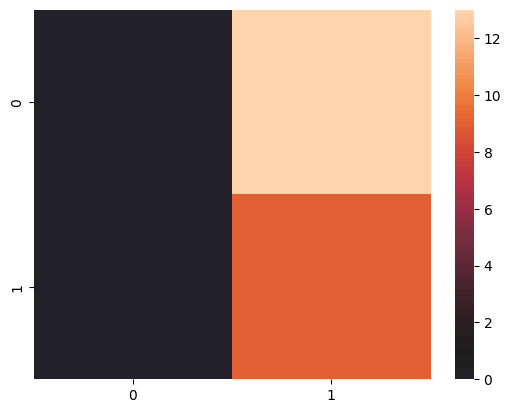

In [59]:
sns.heatmap(cm, center=True)
plt.show()